In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Read data.

In [5]:
data  = pd.read_csv('/content/Medicalpremium.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# Exploratory Data Analysis (or EDA)

In [7]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

## Check null values

In [8]:
data.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


### There are no null record present in our dataset.

## Heatmap

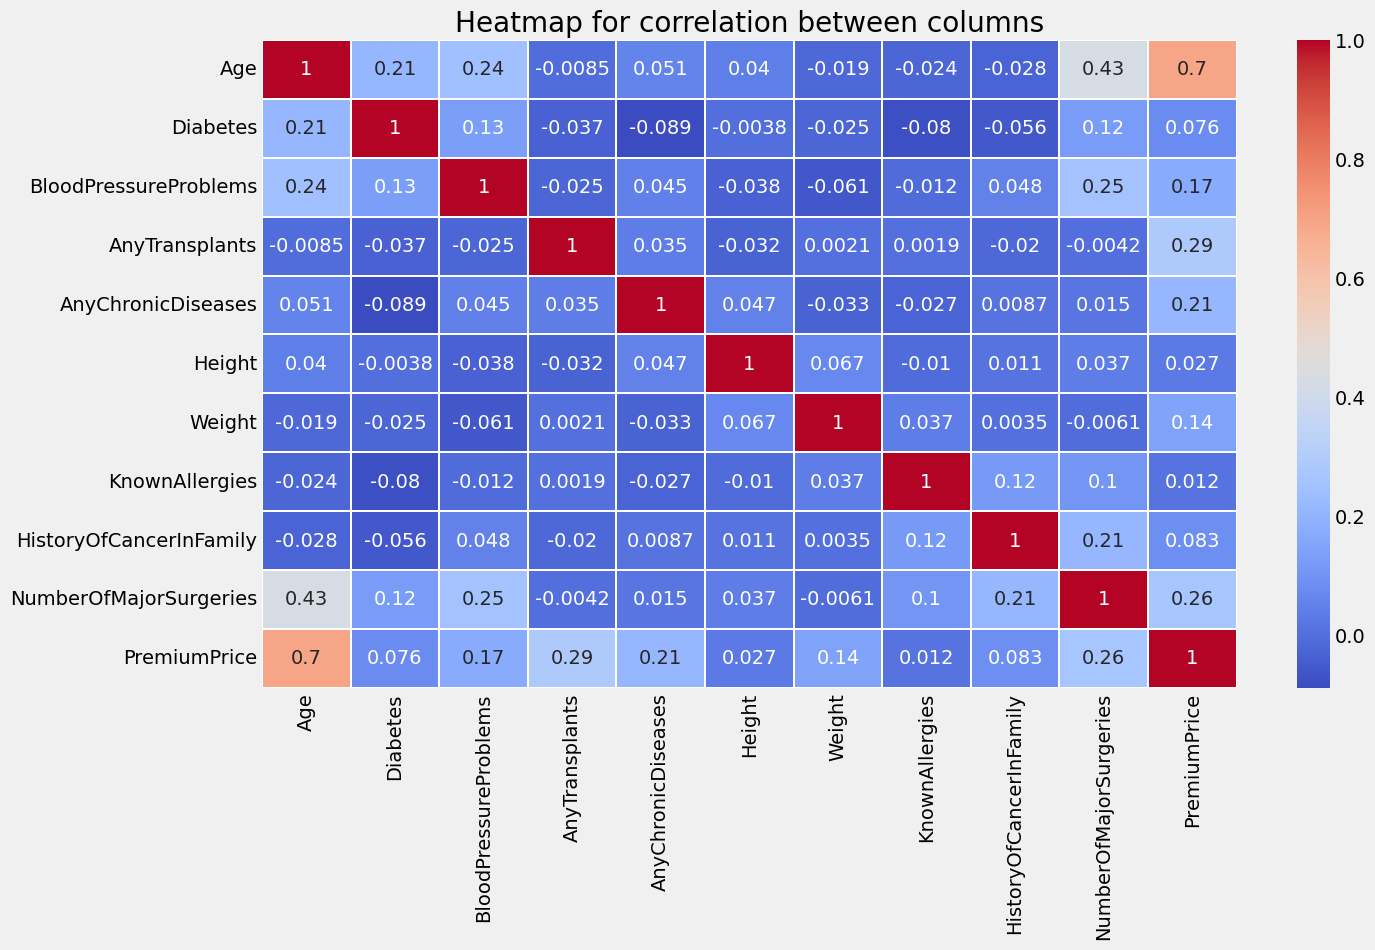

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

## Check datatypes of columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [11]:
data.Age.describe()

,Age
count,986.000000
mean,41.745436
std,13.963371
min,18.000000
25%,30.000000
50%,42.000000
75%,53.000000
max,66.000000


# Data visualizations

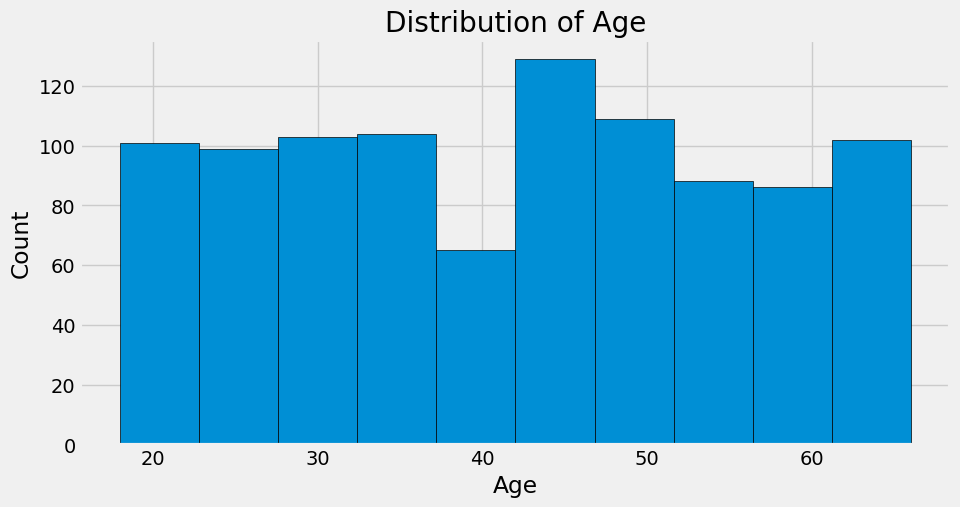

In [12]:
plt.figure(figsize=(10,5))
plt.hist(data.Age,edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Count");
plt.title("Distribution of Age");

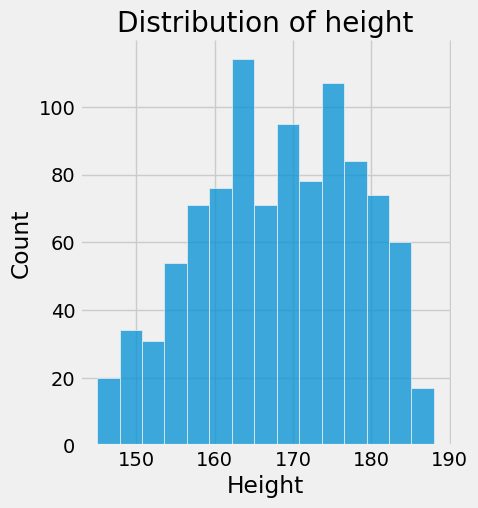

In [13]:
sns.displot(data.Height)
plt.title("Distribution of height");


## The distribution of patient heights right skewed with centre of 168 with no outlier.

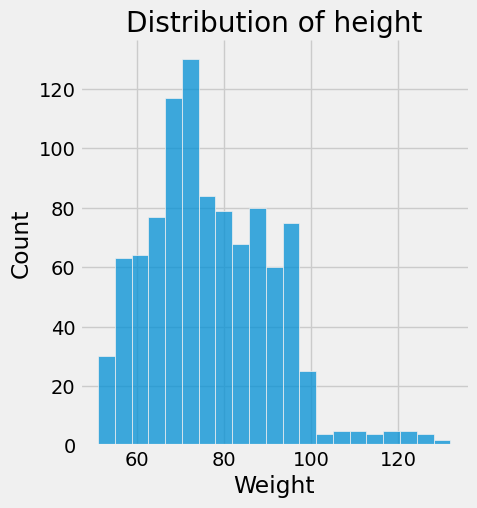

In [14]:
sns.displot(data.Weight)
plt.title("Distribution of height");

## The distribution of patient weights left skewed with centre of 75.

In [15]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

## Pairplots

## Dependent and Independent Features

In [16]:
X = data.drop('PremiumPrice',axis=1)
y = data.PremiumPrice

# Normalization

In [17]:
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])


## To get a good prediction, divide the data into training and testing data, it is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.


In [18]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Model

In [19]:
models = {
    LinearRegression():'Linear Regression',
    RandomForestRegressor():'RandomForest',
    XGBRFRegressor():'XGBRFRegressor'
}
for m in models.keys():
    m.fit(X_train,y_train)


In [20]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Linear Regression is :  68.94071160558988 %
Accuracy Score for RandomForest is :  79.15460841866484 %
Accuracy Score for XGBRFRegressor is :  80.64611431764887 %


# Finding Important Features in Scikit-learn

## 1) Random Forest

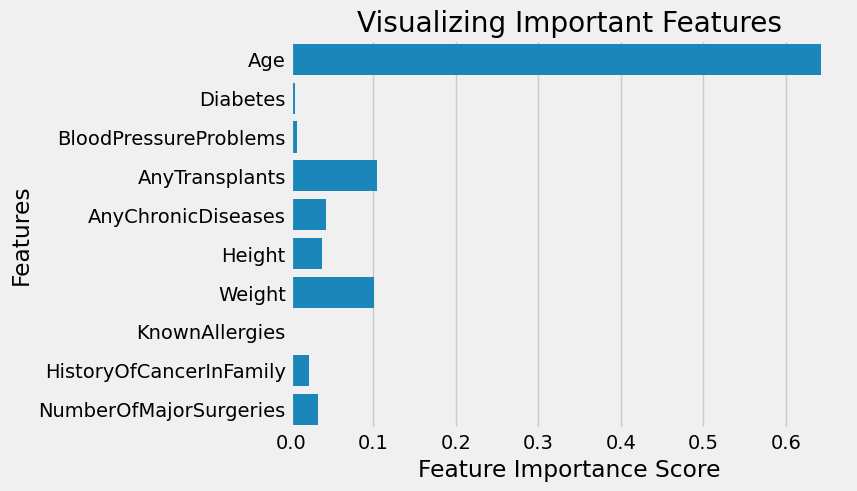

In [21]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

## 2) XGBoostRegressor

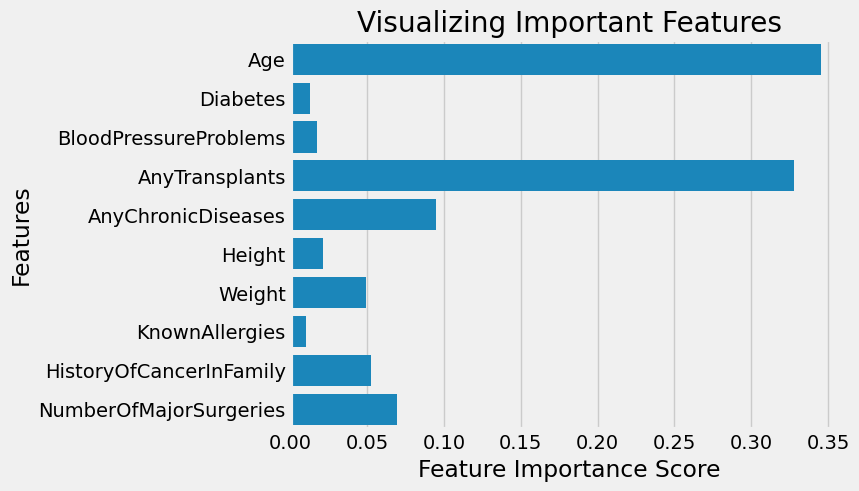

In [22]:
xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

In [23]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4]
}

In [24]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='r2',n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [None, 1, 2, 4],
                         'min_samples_split': [None, 2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [25]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': None, 'min_samples_split': None, 'n_estimators': 200}
Best R2 Score: 0.7714647922899237


In [26]:
# Create a new XGBoost model with the best parameters
best_xgboost = XGBRFRegressor(**best_params)

# Fit the best model to the training data
best_xgboost.fit(X_train, y_train)

# Evaluate the best model on the test data
test_score = best_xgboost.score(X_test, y_test)
print("Test R2 Score with Best Model:", test_score)

Test R2 Score with Best Model: 0.8062519514996755


In [27]:
# the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='r2',n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [None, 1, 2, 4],
                         'min_samples_split': [None, 2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [28]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 Score: 0.7900577430991177


In [29]:
# Create a new Random Forest model with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the best model to the training data
best_rf.fit(X_train, y_train)

# Evaluate the best model on the test data
test_score = best_rf.score(X_test, y_test)
print("Test R2 Score with Best Model:", test_score)


Test R2 Score with Best Model: 0.8273486201006398


In [30]:
results = {
    'Model': ['Random Forest', 'XGBoost'],
    'Train R2 Score': [best_rf.score(X_train, y_train), best_xgboost.score(X_train, y_train)],
    'Test R2 Score': [best_rf.score(X_test, y_test), best_xgboost.score(X_test, y_test)]
}

results_df = pd.DataFrame(results)
print(results_df)

           Model  Train R2 Score  Test R2 Score
0  Random Forest        0.897312       0.827349
1        XGBoost        0.898285       0.806252
